##Cell 1: Importing Libraries and Setting Parameters

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define Parameters
I_load = 20            # Constant Current Load (Amps)
V_nom = 3.6            # Nominal Voltage (Volts)
Wh_range = np.arange(12, 20.1, 0.1)     # Capacity range (Wh)
R_range = np.arange(0.004, 0.0405, 0.0005) # DCIR range (Ohms)

# Thermal Parameters
m_cell = 0.071         # Mass (kg) -> 71g
c_p = 900              # Specific Heat Capacity (J/kg*K)
T_ambient = 25         # Starting Ambient Temp (deg C)

# 2. Create Grid & Calculate Physics
R_grid, Wh_grid = np.meshgrid(R_range, Wh_range)

# A. Runtime Calculation (Hours)
t_run_hours = Wh_grid / (V_nom * I_load)

# B. Energy Loss Calculation (Resistive Heating)
P_loss = (I_load**2) * R_grid       # Watts
E_loss_Wh = P_loss * t_run_hours    # Watt-Hours lost to heat

# C. Usable Energy Calculation
E_usable = Wh_grid - E_loss_Wh

# D. Thermal Calculation (Temperature Rise)
Q_joules = E_loss_Wh * 3600
Delta_T = Q_joules / (m_cell * c_p)
T_final = T_ambient + Delta_T

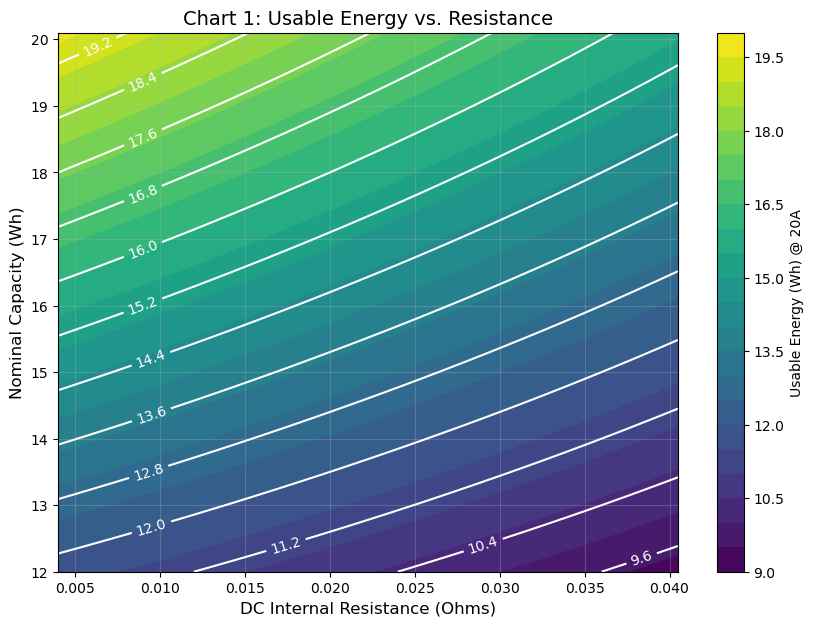

In [8]:
##Cell 2: Plot 1 - Usable Energy
plt.figure(figsize=(10, 7))
cp = plt.contourf(R_grid, Wh_grid, E_usable, 20, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.set_label(f'Usable Energy (Wh) @ {I_load}A')

# Lines of Equivalency
lines = plt.contour(R_grid, Wh_grid, E_usable, 15, colors='white', linewidths=1.5)
plt.clabel(lines, inline=True, fontsize=10, fmt='%1.1f')

plt.title('Chart 1: Usable Energy vs. Resistance', fontsize=14)
plt.xlabel('DC Internal Resistance (Ohms)', fontsize=12)
plt.ylabel('Nominal Capacity (Wh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()